In [1]:
# Basic data analysis for protein proteomics

# First, import things

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from venny4py.venny4py import venny4py

import numpy as np
from sklearn.decomposition import PCA, NMF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, normalize
from math import log10, log2, ceil, floor, sqrt, log, e
from missforest import MissForest
import os

from functions import *

from helpers import general_helpers as gh
from helpers import stats_helpers as sh
from helpers import proteomics_helpers as ph
from helpers import mpl_plotting_helpers as mph

Loading the module: helpers.general_helpers

Loading the module: helpers.stats_helpers.py

numpy        2.0.1
scipy         1.14.0
pandas        2.2.2

Loading the module: helpers.argcheck_helpers

Loading the module: helpers.mpl_plotting_helpers

Loading the module: helpers.pandas_helpers

pandas        2.2.2
numpy         2.0.1

matplotlib    3.9.1
numpy         2.0.1



In [2]:
protein_cols = {"PG.Genes" : "Gene Name",
               "1_0M_Waters_R1.raw.PG.Label-Free Quant" : "Waters R1",
               "2_0M_Waters_R2.raw.PG.Label-Free Quant" : "Waters R2",
               "3_0M_Waters_R3.raw.PG.Label-Free Quant" : "Waters R3",
               "4_0M_Waters_R4.raw.PG.Label-Free Quant" : "Waters R4",
               "5_0M_Waters_R5.raw.PG.Label-Free Quant" : "Waters R5",
               "11_0M_Thermo_R1.raw.PG.Label-Free Quant" : "Thermo R1",
               "12_0M_Thermo_R2.raw.PG.Label-Free Quant" : "Thermo R2",
               "13_0M_Thermo_R3.raw.PG.Label-Free Quant" : "Thermo R3",
               "14_0M_Thermo_R4.raw.PG.Label-Free Quant" : "Thermo R4",
               "15_0M_Thermo_R5.raw.PG.Label-Free Quant" : "Thermo R5",
               "21_0M_TECAN_R1.raw.PG.Label-Free Quant" : "TECAN R1",
               "22_0M_TECAN_R2.raw.PG.Label-Free Quant" : "TECAN R2",
               "23_0M_TECAN_R3.raw.PG.Label-Free Quant" : "TECAN R3",
               "24_0M_TECAN_R4.raw.PG.Label-Free Quant" : "TECAN R4",
               "25_0M_TECAN_R5.raw.PG.Label-Free Quant" : "TECAN R5",
               "31_0M_Protifi_R1.raw.PG.Label-Free Quant" : "ProtiFi R1",
               "32_0M_Protifi_R2.raw.PG.Label-Free Quant" : "ProtiFi R2",
               "33_0M_Protifi_R3.raw.PG.Label-Free Quant" : "ProtiFi R3",
               "34_0M_Protifi_R4.raw.PG.Label-Free Quant" : "ProtiFi R4",
               "35_0M_Protifi_R5.raw.PG.Label-Free Quant" : "ProtiFi R5",}

pep_cols = {"PEP.StrippedSequence" : "Sequence",
               "1_0M_Waters_R1.raw.PEP.Label-Free Quant" : "Waters R1",
               "2_0M_Waters_R2.raw.PEP.Label-Free Quant" : "Waters R2",
               "3_0M_Waters_R3.raw.PEP.Label-Free Quant" : "Waters R3",
               "4_0M_Waters_R4.raw.PEP.Label-Free Quant" : "Waters R4",
               "5_0M_Waters_R5.raw.PEP.Label-Free Quant" : "Waters R5",
               "11_0M_Thermo_R1.raw.PEP.Label-Free Quant" : "Thermo R1",
               "12_0M_Thermo_R2.raw.PEP.Label-Free Quant" : "Thermo R2",
               "13_0M_Thermo_R3.raw.PEP.Label-Free Quant" : "Thermo R3",
               "14_0M_Thermo_R4.raw.PEP.Label-Free Quant" : "Thermo R4",
               "15_0M_Thermo_R5.raw.PEP.Label-Free Quant" : "Thermo R5",
               "21_0M_TECAN_R1.raw.PEP.Label-Free Quant" : "TECAN R1",
               "22_0M_TECAN_R2.raw.PEP.Label-Free Quant" : "TECAN R2",
               "23_0M_TECAN_R3.raw.PEP.Label-Free Quant" : "TECAN R3",
               "24_0M_TECAN_R4.raw.PEP.Label-Free Quant" : "TECAN R4",
               "25_0M_TECAN_R5.raw.PEP.Label-Free Quant" : "TECAN R5",
               "31_0M_Protifi_R1.raw.PEP.Label-Free Quant" : "ProtiFi R1",
               "32_0M_Protifi_R2.raw.PEP.Label-Free Quant" : "ProtiFi R2",
               "33_0M_Protifi_R3.raw.PEP.Label-Free Quant" : "ProtiFi R3",
               "34_0M_Protifi_R4.raw.PEP.Label-Free Quant" : "ProtiFi R4",
               "35_0M_Protifi_R5.raw.PEP.Label-Free Quant" : "ProtiFi R5",}

ptm_cols = {"PG.Genes":"Gene Name",
            "PTM.ModificationTitle" : "Modification Type",
            "PTM.SiteAA" : "Amino acid",
            "PTM.SiteLocation" : "Site",
            "PTM.FlankingRegion" : "Flanking sequence",
            "1_0M_Waters_R1.raw.PTM.Label-Free Quant" : "Waters R1",
            "2_0M_Waters_R2.raw.PTM.Label-Free Quant" : "Waters R2",
            "3_0M_Waters_R3.raw.PTM.Label-Free Quant" : "Waters R3",
            "4_0M_Waters_R4.raw.PTM.Label-Free Quant" : "Waters R4",
            "5_0M_Waters_R5.raw.PTM.Label-Free Quant" : "Waters R5",
            "11_0M_Thermo_R1.raw.PTM.Label-Free Quant" : "Thermo R1",
            "12_0M_Thermo_R2.raw.PTM.Label-Free Quant" : "Thermo R2",
            "13_0M_Thermo_R3.raw.PTM.Label-Free Quant" : "Thermo R3",
            "14_0M_Thermo_R4.raw.PTM.Label-Free Quant" : "Thermo R4",
            "15_0M_Thermo_R5.raw.PTM.Label-Free Quant" : "Thermo R5",
            "21_0M_TECAN_R1.raw.PTM.Label-Free Quant" : "TECAN R1",
            "22_0M_TECAN_R2.raw.PTM.Label-Free Quant" : "TECAN R2",
            "23_0M_TECAN_R3.raw.PTM.Label-Free Quant" : "TECAN R3",
            "24_0M_TECAN_R4.raw.PTM.Label-Free Quant" : "TECAN R4",
            "25_0M_TECAN_R5.raw.PTM.Label-Free Quant" : "TECAN R5",
            "31_0M_Protifi_R1.raw.PTM.Label-Free Quant" : "ProtiFi R1",
            "32_0M_Protifi_R2.raw.PTM.Label-Free Quant" : "ProtiFi R2",
            "33_0M_Protifi_R3.raw.PTM.Label-Free Quant" : "ProtiFi R3",
            "34_0M_Protifi_R4.raw.PTM.Label-Free Quant" : "ProtiFi R4",
            "35_0M_Protifi_R5.raw.PTM.Label-Free Quant" : "ProtiFi R5",}

newheads = ["Missing values", "median intensity",
            "log2(Waters R1)", "log2(Waters R2)", "log2(Waters R3)", "log2(Waters R4)", "log2(Waters R5)", 
             "log2(Thermo R1)", "log2(Thermo R2)", "log2(Thermo R3)", "log2(Thermo R4)", "log2(Thermo R5)", 
             "log2(TECAN R1)", "log2(TECAN R2)", "log2(TECAN R3)", "log2(TECAN R4)", "log2(TECAN R5)", 
             "log2(ProtiFi R1)", "log2(ProtiFi R2)", "log2(ProtiFi R3)", "log2(ProtiFi R4)", "log2(ProtiFi R5)", 
             "Waters log(mean)", "Thermo log(mean)", "TECAN log(mean)", "ProtiFi log(mean)",
             "Waters SD", "Thermo SD", "TECAN SD", "ProtiFi SD",
             "Waters CV%", "Thermo CV%", "TECAN CV%", "ProtiFi CV%"
            ]

colours = ["grey", "red", "green", "blue"]

files = ["20250213_prepmethods_WCD_proteins.csv",
         "20250213_prepmethods_WCD_peptides.csv",
         "20250213_prepmethods_WCD_ptm.csv"]

groups = ["Waters", "Thermo", "TECAN", "ProtiFi"]

def keep_first_row(file,
                   keycol = "flank",
                   heads = 0):
    """
    has to be pre-sorted

    trying to make a more efficient keep_first, we'll see
    """
    keycol_ind = file[heads].index(keycol)
    keepers = []
    latest = None
    i=0
    for row in iter(file):
        if row[keycol_ind] != latest:
            latest = row[keycol_ind]
            keepers.append(row)
        if i % 50000 == 0:
            print(i)
        i+=1
    return keepers

def unique_ptm(file, 
               ptm_type = "Phospho (STY)",
               ptm_col = "Modification Type",
               aa = "Amino acid",
               site = "Site",
               gene = "Gene Name",
               flank = "Flanking sequence",
               ptm_aas = ["Y"]):
    # First, get the column indices from the names
    ptm_loc = file[0].index(ptm_col)
    aa_loc = file[0].index(aa)
    site_loc = file[0].index(site)
    gene_loc = file[0].index(gene)
    flank_loc = file[0].index(flank)
    # Filter for only the PTM of interest
    file = [file[0]] + [row for row in file if row[ptm_loc] == ptm_type]
    # Make a string for the site
    file = [file[0] + ["Site String"]] + [row + [f"{row[gene_loc]}$^{{{row[aa_loc]}{int(row[site_loc])}}}$"] for row in file[1:]]
    # Filter for unique flanking sequences
    file = [file[0]] + sorted(file[1:], key = lambda x: x[flank_loc])
    file = keep_first_row(file, keycol = flank, heads = 0)
    # Keep only tyrosine phosphorylated stuff
    file = [file[0]] + [row for row in file if row[aa_loc] in ptm_aas]
    # Return the file
    return file

def read_file(filename,
              rename_columns,
              group_labels,
              new_heads,
              glob_group = groups,
              protein = True,
              sort_head = "Gene Name",
              ptm = False,
              stats = False,
              comparisons = None,
              comp_heads = None,
              pi0 = None,
              impute = False,
              ptm_kwargs = {"ptm_type" : "Phospho (STY)",
                            "ptm_col" : "Modification Type",
                            "aa" : "Amino acid",
                            "site" : "Site",
                            "gene" : "Gene Name",
                            "flank" : "Flanking sequence",
                            "ptm_aas" : ["Y"]}):
    file = pd.read_csv(filename)
    file = file.rename(columns = rename_columns)[list(rename_columns.values())]
    original_heads = list(file.columns.values)
    group_indices = {g : [i for i in range(len(file.columns)) if g in file.columns[i]]
                     for g in group_labels}
    data_range = [min(gh.unpack_list([value for key, value in group_indices.items()])), 
                  max(gh.unpack_list([value for key, value in group_indices.items()]))]
    # Then continue as normal
    log_indices = {key : [i + 3 + data_range[1]-data_range[0]+1 for i in value] for key, value in group_indices.items()}
    file = [list(row) for row in file.to_numpy()]
    file = [gh.transform_values(row, transform = float) for row in file]
    # because there are strange characters in the gene names
    file = [row for row in file if type(row[0]) == str]
    # Calculate missing values across a row
    file = [row + [sum([1 for _ in row[data_range[0]:data_range[1]+1] if _ != _])] for row in file]
    # Calculate highest median intensity
    file = [row + [sh.median(row[data_range[0]:data_range[1]+1])] for row in file]
    # Sort the file based on those two criteria and the sort column
    print(original_heads)
    file = sorted(file, key = lambda x: (x[original_heads.index(sort_head)], x[-2], -x[-1]))
    if ptm:
        file = unique_ptm([original_heads + new_heads] + file, **ptm_kwargs)
    else:
        file = keep_first([original_heads + new_heads] + file, keycol = sort_head)
    # Then log stransform
    log_data = [[safe_log2(item) for item in row[data_range[0]:data_range[1]+1]]
                for row in file[1:]]
    # and split/input the logged data
    imputable_data = [[file[i+1][original_heads.index(sort_head)]]+log_data[i] for i in range(len(log_data))]
    if impute:
        log_data = split_and_impute(gh.transpose(*imputable_data), 
                                glob_group,
                                header_row = [sort_head] + [head for head in new_heads if "log2(" in head])
    assert len(log_data)+1 == len(file), "Imputed data do not have the same size as original data. Maybe the index carried over?"
    # Get rid of the heads for now
    file = [file[i+1] + log_data[i] for i in range(len(log_data))]
    file = [row + [safe_log2(sh.mean([row[i] for i in value])) for key, value in group_indices.items()]
            for row in file]
    file = [row + [sh.standard_deviation([row[i] for i in value]) 
                   for key, value in log_indices.items()] for row in file]
    file = [row + [cv_perc(sh.standard_deviation([row[i] for i in value]))
                   for key, value in log_indices.items()] for row in file]
    if stats == True and comparisons != None:
        file, sheads = perform_stats(file,
                              log_indices, 
                              comparisons,
                              logged = True,
                              pi0 = pi0)
        file = [original_heads + new_heads + sheads] + file
    else:
        file = [original_heads + new_heads] + file
    return file, log_data, group_indices, log_indices


['Gene Name', 'Waters R1', 'Waters R2', 'Waters R3', 'Waters R4', 'Waters R5', 'Thermo R1', 'Thermo R2', 'Thermo R3', 'Thermo R4', 'Thermo R5', 'TECAN R1', 'TECAN R2', 'TECAN R3', 'TECAN R4', 'TECAN R5', 'ProtiFi R1', 'ProtiFi R2', 'ProtiFi R3', 'ProtiFi R4', 'ProtiFi R5']
	0
[['Waters', [3962, 3773, 3599, 3587, 3737]], ['Thermo', [3685, 3803, 3753, 3635, 3748]], ['TECAN', [3455, 3679, 3264, 3384, 3421]], ['ProtiFi', [4784, 4776, 4647, 4683, 4758]]]
PCA
here
20
[[], [], [], [], []]


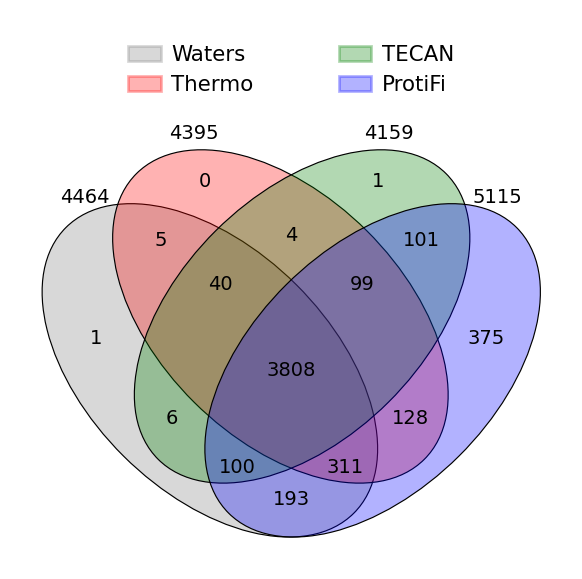

In [3]:
pg_file, pg_log, pg_group_inds, pg_log_inds = read_file(files[0],
                protein_cols,
                groups,
                newheads,
                ptm= False,
                stats = False,
                pi0 = None,
                impute = False,
                comparisons = None,
                sort_head = "Gene Name")

plot_counts(gh.transpose(*pg_file), 
            "outputs/pg_protein_counts", 
            groups, 
            [value for key, value in pg_group_inds.items()],
            sample_counts =False,
            dotplot_kwargs = dict(rotation = 90, 
                                      ylabel = "Proteins",
                                      colours = colours,
                                      markersize = 20,
                                      figsize = (3,6),
                                      ymin = 0 )
           ) 

multi_reg_lineplot(pd.DataFrame(pg_log, columns = newheads[2:22]),
                   groups = groups,
                   labels = groups,
                   log2_trans = True,
                   savefile = "outputs/pg_protein_linreg.pdf")

pca_ax = cluster_plotting([pd.DataFrame(pg_log, columns =  newheads[2:22])], # list with minimum 1 df
                 groups,         
                 [fr"PCA Clustering, Proteins"],
                 ["outputs/pg_protein_pca.pdf"],
                 [slice(5*i,5*(i+1)) for i in range(4)],
                 groups,
                 [colours],
                 markers = ["o", "^",  "s",  "d"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                          square = False,
                 pca_kwargs = dict(n_components = 5,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),)

hist_data = gh.transpose(*pg_log)
hist_data = [[item for item in col if item == item] for col in hist_data]
hist_data = [hist_data[i*5:(i+1)*5] for i in range(4)]

hist_matrix(hist_data, # Assumes no headers, remove them
            groups,
            ["R1" , "R2", "R3", "R4", "R5"],
            bins = 100,
            ymax = 400,
            xlims = (10,40),
            ygroup_size = [1,1,1,1], # Should be top to bottom
            y_groups = [groups[-i] for i in range(1,len(groups)+1)],     # Should be top to bottom
            title = "Peptides",
            fontdict = dict(fontfamily = "sans-serif",
                                font = "Arial",
                                fontstyle = "normal"),
            primary = ("lavender", "mediumpurple"),
            secondary = ("pink", "mediumvioletred"),
            figsize = (16,12),
            savefile = "outputs/pg_protein_hist.pdf",
            missing = [[],[],[],[],[]])

venn_4set(gh.transpose(*pg_file), 
          [value for key, value in pg_group_inds.items()], 
          [key for key, value in pg_group_inds.items()], 
          colours = colours,
          index_col = pg_file[0].index("Gene Name"),
          filename = "outputs/pg_protein_venn.pdf")

/tmp/ipykernel_17322/281724451.py:156: DtypeWarning: Columns (78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(filename)


['Sequence', 'Waters R1', 'Waters R2', 'Waters R3', 'Waters R4', 'Waters R5', 'Thermo R1', 'Thermo R2', 'Thermo R3', 'Thermo R4', 'Thermo R5', 'TECAN R1', 'TECAN R2', 'TECAN R3', 'TECAN R4', 'TECAN R5', 'ProtiFi R1', 'ProtiFi R2', 'ProtiFi R3', 'ProtiFi R4', 'ProtiFi R5']
	0
[['Waters', [28155, 27276, 25379, 22195, 26186]], ['Thermo', [25571, 26631, 25947, 25052, 25906]], ['TECAN', [22785, 24173, 18166, 21084, 22285]], ['ProtiFi', [37886, 39160, 37140, 35298, 38036]]]
PCA
here
20
[[], [], [], [], []]


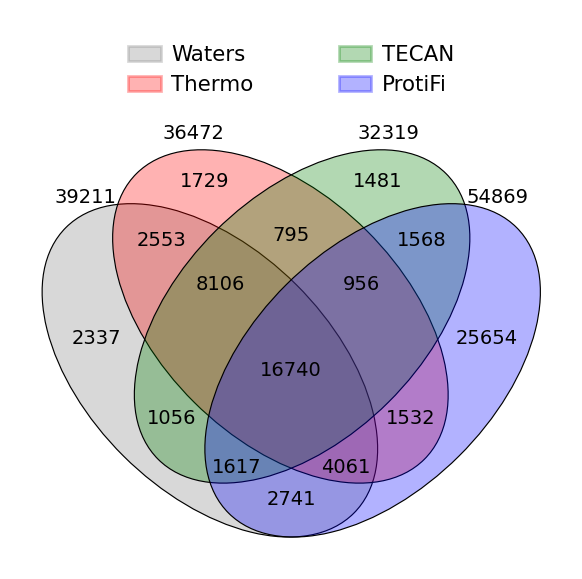

In [4]:
pep_file, pep_log, pep_group_inds, pep_log_inds = read_file(files[1],
                pep_cols,
                groups,
                newheads,
                ptm= False,
                stats = False,
                pi0 = None,
                impute = False,
                comparisons = None,
                sort_head = "Sequence")

plot_counts(gh.transpose(*pep_file), 
            "outputs/pg_pep_counts", 
            groups, 
            [value for key, value in pep_group_inds.items()],
            sample_counts =False,
            dotplot_kwargs = dict(rotation = 90, 
                                      ylabel = "Peptides",
                                      colours = colours,
                                      markersize = 20,
                                      figsize = (3,6),
                                      ymin = 0 )
           ) 

multi_reg_lineplot(pd.DataFrame(pep_log, columns = newheads[2:22]),
                   groups = groups,
                   labels = groups,
                   log2_trans = True,
                   savefile = "outputs/pg_pep_linreg.pdf")

pca_ax = cluster_plotting([pd.DataFrame(pep_log, columns =  newheads[2:22])], # list with minimum 1 df
                 groups,         
                 [fr"PCA Clustering, Peptides"],
                 ["outputs/pg_pep_pca.pdf"],
                 [slice(5*i,5*(i+1)) for i in range(4)],
                 groups,
                 [colours],
                 markers = ["o", "^",  "s",  "d"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                          square = False,
                 pca_kwargs = dict(n_components = 5,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),)

hist_data = gh.transpose(*pep_log)
hist_data = [[item for item in col if item == item] for col in hist_data]
hist_data = [hist_data[i*5:(i+1)*5] for i in range(4)]

hist_matrix(hist_data, # Assumes no headers, remove them
            groups,
            ["R1" , "R2", "R3", "R4", "R5"],
            bins = 100,
            ymax = 400,
            xlims = (10,40),
            ygroup_size = [1,1,1,1], # Should be top to bottom
            y_groups = [groups[-i] for i in range(1,len(groups)+1)],     # Should be top to bottom
            title = "Peptides",
            fontdict = dict(fontfamily = "sans-serif",
                                font = "Arial",
                                fontstyle = "normal"),
            primary = ("lavender", "mediumpurple"),
            secondary = ("pink", "mediumvioletred"),
            figsize = (16,12),
            savefile = "outputs/pg_protein_hist.pdf",
            missing = [[],[],[],[],[]])

venn_4set(gh.transpose(*pep_file), 
          [value for key, value in pep_group_inds.items()], 
          [key for key, value in pep_group_inds.items()], 
          colours = colours,
          index_col = pg_file[0].index("Gene Name"),
          filename = "outputs/pg_pep_venn.pdf")

/tmp/ipykernel_17322/281724451.py:156: DtypeWarning: Columns (95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(filename)


['Gene Name', 'Modification Type', 'Amino acid', 'Site', 'Flanking sequence', 'Waters R1', 'Waters R2', 'Waters R3', 'Waters R4', 'Waters R5', 'Thermo R1', 'Thermo R2', 'Thermo R3', 'Thermo R4', 'Thermo R5', 'TECAN R1', 'TECAN R2', 'TECAN R3', 'TECAN R4', 'TECAN R5', 'ProtiFi R1', 'ProtiFi R2', 'ProtiFi R3', 'ProtiFi R4', 'ProtiFi R5']
0
[['Waters', [134, 202, 213, 205, 242]], ['Thermo', [150, 168, 147, 158, 163]], ['TECAN', [76, 76, 68, 66, 71]], ['ProtiFi', [444, 449, 394, 459, 471]]]
PCA
here
20
[[], [], [], [], []]


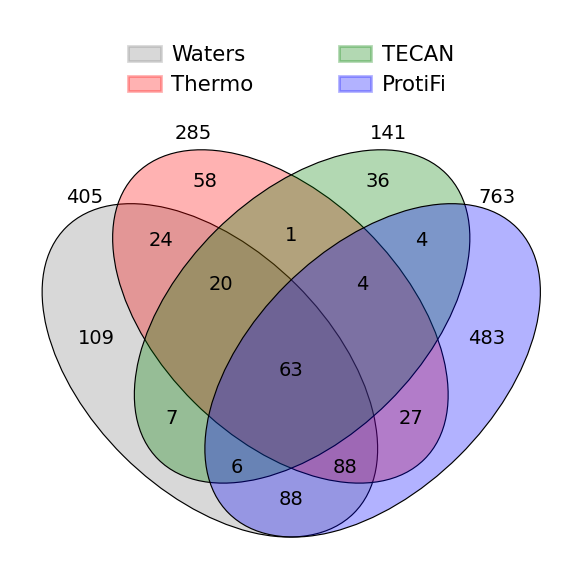

In [5]:
ptm_file, ptm_log, ptm_group_inds, ptm_log_inds = read_file(files[2],
                ptm_cols,
                groups,
                newheads[:2] + ["tex formatted site"] + newheads[2:],
                ptm= True,
                stats = False,
                pi0 = None,
                impute = False,
                comparisons = None,
                sort_head = "Flanking sequence",
                ptm_kwargs = {"ptm_type" : "Phospho (STY)",
                            "ptm_col" : "Modification Type",
                            "aa" : "Amino acid",
                            "site" : "Site",
                            "gene" : "Gene Name",
                            "flank" : "Flanking sequence",
                            "ptm_aas" : ["Y", "S", "T"]})


plot_counts(gh.transpose(*ptm_file), 
            "outputs/pg_phospho_counts", 
            groups, 
            [value for key, value in ptm_group_inds.items()],
            sample_counts =False,
            dotplot_kwargs = dict(rotation = 90, 
                                      ylabel = "pY sites",
                                      colours = colours,
                                      markersize = 20,
                                      figsize = (3,6),
                                      ymin = 0 )
           ) 

multi_reg_lineplot(pd.DataFrame(ptm_log, columns = newheads[3:23]),
                   groups = groups,
                   labels = groups,
                   log2_trans = True,
                   savefile = "outputs/pg_phospho_linreg.pdf")

pca_ax = cluster_plotting([pd.DataFrame(ptm_log, columns =  newheads[3:23])], # list with minimum 1 df
                 groups,         
                 [fr"PCA Clustering, Phospho (STY) Sites"],
                 ["outputs/pg_phospho_.pdf"],
                 [slice(5*i,5*(i+1)) for i in range(4)],
                 groups,
                 [colours],
                 markers = ["o", "^",  "s",  "d"],
                 cluster = 'PCA',
                 markersize=100,
                 textdict = dict(fontfamily = "sans-serif",
                 font = "Arial",
                 fontweight = "bold",
                 fontsize = 10),
                          square = False,
                 pca_kwargs = dict(n_components = 5,
                                   whiten = False,
                                   svd_solver = "full",
                                   tol = 0),)

hist_data = gh.transpose(*ptm_log)
hist_data = [[item for item in col if item == item] for col in hist_data]
hist_data = [hist_data[i*5:(i+1)*5] for i in range(4)]

hist_matrix(hist_data, # Assumes no headers, remove them
            groups,
            ["R1" , "R2", "R3", "R4", "R5"],
            bins = 10,
            ymax = 50,
            xlims = (10,30),
            ygroup_size = [1,1,1,1], # Should be top to bottom
            y_groups = [groups[-i] for i in range(1,len(groups)+1)],     # Should be top to bottom
            title = "Phospho (STY) Sites",
            fontdict = dict(fontfamily = "sans-serif",
                                font = "Arial",
                                fontstyle = "normal"),
            primary = ("lavender", "mediumpurple"),
            secondary = ("pink", "mediumvioletred"),
            figsize = (16,12),
            savefile = "outputs/pg_phospho_hist.pdf",
            missing = [[],[],[],[],[]])

venn_4set(gh.transpose(*ptm_file), 
          [value for key, value in ptm_group_inds.items()], 
          [key for key, value in ptm_group_inds.items()], 
          colours = colours,
          index_col = ptm_file[0].index("Flanking sequence"),
          filename = "outputs/pg_phospho_venn.pdf")


In [6]:
pd.DataFrame(pg_file[1:], columns = pg_file[0]).to_excel("outputs/Supporting Table 1 WCD Protein data.xlsx")
pd.DataFrame(ptm_file[1:], columns = ptm_file[0]).to_excel("outputs/Supporting Table 2 WCD PTM data.xlsx")
pd.DataFrame(pep_file[1:], columns = pep_file[0]).to_excel("outputs/Supporting Table 3 WCD Peptide data.xlsx")
